In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Project 2: Traffic Light Detection using Color Spaces

### 2.1 Overview

In this project, we detect which traffic light is active (red, orange, or green) by converting to HSV color space and creating color masks.

### 2.2 Objectives

- Convert color image to HSV color space
- Create masks for red, orange, and green lights
- Automatically detect which light is currently ON

### 2.3 Why HSV Instead of BGR/RGB?

**The Problem with BGR/RGB:**

- Colors are mixed together (R, G, B channels)
- Same color at different brightness levels = different values
- Hard to detect specific colors reliably

**The Solution - HSV:**

- **H (Hue)**: The actual color (0-180 in OpenCV)
- **S (Saturation)**: Color purity
- **V (Value)**: Brightness

A red light stays in the same **Hue range** (0-10) regardless of how bright or dim it is. This makes color detection much more reliable!

### 2.4 Code: Convert to HSV and Display

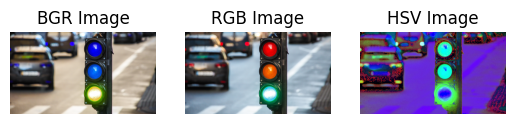

In [3]:
# Load image
bgr_image = cv2.imread('./images/traffic-light.jpg')
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

# Display all three color spaces
plt.subplot(1, 3, 1)
plt.imshow(bgr_image)
plt.title("BGR Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(hsv_image)
plt.title("HSV Image")
plt.axis("off")

plt.show()

### 2.5 Code: Create Color Masks

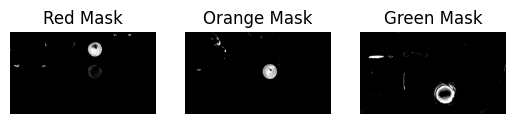

In [4]:
# Define HSV ranges for each color
lower_red = np.array([0, 120, 100])
upper_red = np.array([5, 255, 255])

lower_orange = np.array([8, 120, 100])
upper_orange = np.array([20, 255, 255])

lower_green = np.array([40, 80, 100])
upper_green = np.array([100, 255, 255])

# Create masks using inRange()
# If pixel HSV is between lower and upper bounds → WHITE (255)
# Otherwise → BLACK (0)
mask_red = cv2.inRange(hsv_image, lower_red, upper_red)
mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Display all masks
plt.subplot(1, 3, 1)
plt.imshow(mask_red, cmap='gray')
plt.title("Red Mask")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask_orange, cmap='gray')
plt.title("Orange Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(mask_green, cmap='gray')
plt.title("Green Mask")
plt.axis("off")

plt.show()

### 2.6 Code: Detect Which Light is ON

In [5]:
# Count white pixels in each mask
# cv2.countNonZero() counts all pixels that are NOT 0 (i.e., white pixels)
count_red = cv2.countNonZero(mask_red)
count_orange = cv2.countNonZero(mask_orange)
count_green = cv2.countNonZero(mask_green)

print(f"Red pixels: {count_red}")
print(f"Orange pixels: {count_orange}")
print(f"Green pixels: {count_green}")

# Find which light has the most white pixels
if count_red > count_orange and count_red > count_green:
    light_on = "RED"
elif count_orange > count_red and count_orange > count_green:
    light_on = "ORANGE"
elif count_green > count_red and count_green > count_orange:
    light_on = "GREEN"
else:
    light_on = "UNKNOWN"

print(f"\n🚦 Light Detected: {light_on}")

Red pixels: 9268
Orange pixels: 9837
Green pixels: 14999

🚦 Light Detected: GREEN
